<a href="https://colab.research.google.com/github/hyyoka/DeepLearning-models-Implemetation-from-scratch/blob/main/Batch_Gradient_Descent_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Batch Gradient Descent from scratch

이번 포스트에서는 Linear Regression과 Logistic Regression에 대한 batch 단위의 경사하강법을 구현한다. 구현할 batch 학습 목록은 다음과 같다:

- BGD: 학습 한 번에 모든 데이터셋에 대한 기울기를 구하기
- SGD: 학습 한 번에 임의의 데이터에 대해서 기울기를 구하기
- MGD: 학습 한 번에 데이터셋의 일부에 대해서만 기울기를 구하기

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
X_train = [[1.0, 0.18789304084079325, -1.1433349554080652], [1.0, 1.1855552045972182, 0.043974421361848495], [1.0, -0.3109380410374192, -0.3517953708947894], [1.0, -1.6292773288584093, -1.341219851536384], [1.0, -1.308600204793844, 0.043974421361848495], [1.0, 1.613124703349972, 1.6270535903884], [1.0, 1.7912786611636193, 2.7484013351155405], [1.0, 0.00973908302714593, -0.41775700293756235], [1.0, 0.9361396636581122, 0.7695523738323513], [1.0, -1.308600204793844, -2.13275943604966], [1.0, 0.9361396636581122, 0.3078209495329404], [1.0, 1.862540244289078, 0.43974421361848637], [1.0, -0.6316151651019843, -0.3517953708947894], [1.0, 0.43730858177989956, 0.10993605340462147], [1.0, -0.524722790413796, -1.0114116913225193], [1.0, 0.36604699865444057, 0.24185931749016742], [1.0, 0.3304162070917112, 0.37378258157571337], [1.0, 0.5442009564680879, -0.15391047476647043], [1.0, 0.43730858177989956, -0.8794884272369732], [1.0, -1.664908120421139, -1.275258219493611], [1.0, -0.382199624162878, -0.08794884272369746], [1.0, 1.2924475792854067, 1.297245430174535], [1.0, -0.91666149760382, -0.2858337388520164], [1.0, 0.18789304084079325, -0.021987210680924487], [1.0, -1.3798617879193031, -0.7475651631514273], [1.0, -0.382199624162878, -0.5496802670231083], [1.0, -0.8097691229156316, -1.0773733233652922], [1.0, -1.2017078301056558, -1.0114116913225193], [1.0, -0.8453999144783612, -0.7475651631514273], [1.0, -0.8810307060410906, -0.9454500592797462], [1.0, -1.308600204793844, -0.7475651631514273], [1.0, -0.7028767482274433, -1.4071814835791572], [1.0, 0.00973908302714593, -0.21987210680924343], [1.0, 0.6154625395935468, 1.2312837981317621], [1.0, -0.13278408322377172, 0.7035907417895783], [1.0, -0.5603535819765253, -0.21987210680924343], [1.0, -0.8097691229156316, -0.3517953708947894], [1.0, -0.8453999144783612, -0.2858337388520164], [1.0, 0.3304162070917112, 0.9674372699606703], [1.0, 0.11663145771533426, 0.43974421361848637], [1.0, -1.2729694132311147, -1.539104747664703], [1.0, -1.4154925794820326, -1.4731431156219301], [1.0, 1.5418631202245128, 2.154746646730584], [1.0, -1.6292773288584093, -0.6156418990658813], [1.0, 0.7579857058444648, 0.5057058456612593], [1.0, -1.3442309963565735, -0.8794884272369732], [1.0, 1.6843862864754306, 0.5716674777040324], [1.0, 1.1499244130344888, 1.2312837981317621], [1.0, -0.7385075397901727, -0.08794884272369746], [1.0, -0.8453999144783612, -0.21987210680924343], [1.0, -0.9522922891665494, -1.934874539921341], [1.0, 1.2211859961599474, 1.429168694260081], [1.0, -0.7385075397901727, -0.6156418990658813], [1.0, -1.451123371044762, -1.1433349554080652], [1.0, -0.5959843735392548, -0.15391047476647043], [1.0, 0.8648780805326531, 1.033398902003443], [1.0, -1.0235538722920083, -1.1433349554080652], [1.0, -0.025891708535583407, -1.4071814835791572], [1.0, -1.5223849541702208, 0.043974421361848495], [1.0, -0.7385075397901727, -0.6156418990658813], [1.0, 1.1142936214717594, 0.8355140058751243], [1.0, 1.1499244130344888, 0.9014756379178972], [1.0, -1.308600204793844, -0.15391047476647043], [1.0, 0.2235238324035229, 1.4951303263028541], [1.0, 0.47293937334262887, 0.7035907417895783], [1.0, 1.4706015370990542, 1.956861750602265], [1.0, -0.524722790413796, -0.48371863498033535], [1.0, -0.20404566634923071, 0.8355140058751243], [1.0, 0.7223549142817351, -0.48371863498033535], [1.0, 0.04536987458987558, 0.5716674777040324], [1.0, 1.5418631202245128, 1.758976854473946], [1.0, 0.04536987458987558, 0.6376291097468053], [1.0, 1.7556478696008895, -1.0114116913225193], [1.0, -0.06152250009831306, -0.6156418990658813], [1.0, 1.7912786611636193, 1.956861750602265], [1.0, 1.1499244130344888, 1.363207062217308], [1.0, -0.20404566634923071, -0.15391047476647043], [1.0, 0.6154625395935468, 0.7695523738323513], [1.0, 1.5418631202245128, 2.28666991081613], [1.0, 1.5418631202245128, 0.24185931749016742], [1.0, 0.9717704552208415, 0.7035907417895783], [1.0, 0.7579857058444648, 0.043974421361848495], [1.0, 1.2211859961599474, 1.297245430174535], [1.0, 1.862540244289078, 2.088785014687811], [1.0, -0.7741383313529021, -1.0773733233652922], [1.0, 0.6510933311562762, -0.6156418990658813], [1.0, -1.1304462469801968, 0.8355140058751243], [1.0, -0.9879230807292789, -1.539104747664703], [1.0, 1.7912786611636193, 0.9014756379178972], [1.0, -1.059184663854738, -0.3517953708947894], [1.0, 1.0786628299090297, 0.43974421361848637], [1.0, 0.9717704552208415, 0.9674372699606703], [1.0, -1.4867541626074916, -1.341219851536384], [1.0, -0.6316151651019843, -0.21987210680924343], [1.0, -0.8097691229156316, -0.6816035311086542], [1.0, -1.0235538722920083, -1.1433349554080652], [1.0, -1.6292773288584093, -0.8135267951942002], [1.0, 0.5085701649053586, 0.43974421361848637], [1.0, -1.451123371044762, -1.1433349554080652], [1.0, -0.7028767482274433, 0.17589768544739445], [1.0, -0.9522922891665494, -1.2092965874508381], [1.0, 0.6154625395935468, 0.8355140058751243], [1.0, 0.1522622492780639, 0.24185931749016742], [1.0, -0.8097691229156316, -1.1433349554080652], [1.0, 0.18789304084079325, -0.21987210680924343], [1.0, -0.8097691229156316, -0.9454500592797462], [1.0, -1.451123371044762, -0.6156418990658813], [1.0, -0.7028767482274433, -0.21987210680924343], [1.0, 1.3637091624108655, 1.2312837981317621], [1.0, 1.2211859961599474, -0.021987210680924487], [1.0, -0.8453999144783612, -0.15391047476647043], [1.0, 1.1499244130344888, 0.24185931749016742], [1.0, -1.059184663854738, -0.08794884272369746], [1.0, 0.2947854155289816, 0.5716674777040324], [1.0, -0.7385075397901727, -0.6816035311086542], [1.0, -0.09715329166104239, -0.08794884272369746], [1.0, -1.4867541626074916, -1.275258219493611], [1.0, -0.453461207288337, -0.48371863498033535], [1.0, 0.11663145771533426, -0.2858337388520164], [1.0, -0.23967645791196038, -1.605066379707476], [1.0, 0.18789304084079325, 1.0993605340462163], [1.0, -1.1660770385429262, -0.08794884272369746], [1.0, -0.20404566634923071, 0.3078209495329404], [1.0, -1.1660770385429262, -0.3517953708947894], [1.0, 0.7223549142817351, 0.24185931749016742], [1.0, 0.8292472889699235, 0.5057058456612593], [1.0, -0.91666149760382, -1.539104747664703], [1.0, 1.328078370848136, 0.043974421361848495], [1.0, -0.13278408322377172, 0.17589768544739445], [1.0, 0.2591546239662522, -0.5496802670231083], [1.0, 0.9005088720953824, -0.2858337388520164], [1.0, -0.4890919988510665, -1.0773733233652922], [1.0, 0.5085701649053586, -0.3517953708947894], [1.0, 0.11663145771533426, -0.41775700293756235], [1.0, -0.9522922891665494, -0.8794884272369732], [1.0, 0.2947854155289816, 0.7035907417895783], [1.0, -0.2753072494746897, 0.37378258157571337], [1.0, -0.23967645791196038, 1.297245430174535], [1.0, 0.5442009564680879, 1.363207062217308], [1.0, 1.1855552045972182, 2.418593174901676], [1.0, -1.1660770385429262, -1.868912907878568], [1.0, -1.5223849541702208, -2.330644332177979], [1.0, 0.5798317480308175, -0.15391047476647043], [1.0, 1.862540244289078, 1.1653221660889892], [1.0, 1.8269094527263487, 1.693015222431173], [1.0, 0.6867241227190058, -0.08794884272369746], [1.0, 0.00973908302714593, 0.5057058456612593], [1.0, 0.7936164974071942, 1.363207062217308], [1.0, 1.007401246783571, 0.8355140058751243], [1.0, 0.5442009564680879, 0.7035907417895783]]
X_test = [[1.0, -1.3442309963565735, -0.6156418990658813], [1.0, 0.5085701649053586, 0.3078209495329404], [1.0, -0.3109380410374192, 0.5716674777040324], [1.0, 1.3637091624108655, 1.956861750602265], [1.0, -0.9879230807292789, -0.7475651631514273], [1.0, -0.09715329166104239, -0.15391047476647043], [1.0, 0.6154625395935468, 0.24185931749016742], [1.0, 0.6154625395935468, -0.6816035311086542], [1.0, 1.862540244289078, 0.9014756379178972], [1.0, 0.9005088720953824, 0.43974421361848637], [1.0, 1.7556478696008895, 1.033398902003443], [1.0, 1.7912786611636193, 1.693015222431173], [1.0, 0.6154625395935468, 0.7035907417895783], [1.0, -0.3109380410374192, -0.48371863498033535], [1.0, -0.91666149760382, -1.0114116913225193], [1.0, 1.1855552045972182, 1.4951303263028541], [1.0, -1.4154925794820326, -1.1433349554080652], [1.0, -0.8097691229156316, -0.5496802670231083], [1.0, 0.9005088720953824, 1.561091958345627], [1.0, 0.43730858177989956, 0.24185931749016742], [1.0, 1.0786628299090297, 0.3078209495329404], [1.0, -0.09715329166104239, 0.5716674777040324], [1.0, -0.025891708535583407, -0.6156418990658813], [1.0, 0.9717704552208415, 1.6270535903884], [1.0, 0.9717704552208415, 0.6376291097468053], [1.0, 1.0430320383463005, 0.37378258157571337], [1.0, -0.2753072494746897, 0.24185931749016742], [1.0, -1.4154925794820326, -0.9454500592797462], [1.0, 0.2591546239662522, -0.021987210680924487], [1.0, -1.6292773288584093, -2.198721068092433], [1.0, 0.36604699865444057, 0.6376291097468053], [1.0, -0.6672459566647139, -0.021987210680924487], [1.0, 1.5418631202245128, 1.033398902003443], [1.0, 0.1522622492780639, -0.3517953708947894], [1.0, 0.5085701649053586, 1.0993605340462163], [1.0, -0.6672459566647139, -0.41775700293756235], [1.0, 1.6487554949127015, 0.9014756379178972], [1.0, 0.43730858177989956, 0.7035907417895783], [1.0, 1.0430320383463005, 2.154746646730584], [1.0, -0.41783041572560753, -0.48371863498033535], [1.0, 0.5442009564680879, 0.9014756379178972], [1.0, -1.1304462469801968, -1.605066379707476], [1.0, 1.5418631202245128, 2.418593174901676], [1.0, 1.4706015370990542, 1.890900118559492], [1.0, -1.308600204793844, -0.41775700293756235], [1.0, 1.1142936214717594, 1.4951303263028541], [1.0, 1.3993399539735947, 1.1653221660889892], [1.0, 0.9717704552208415, 0.7695523738323513], [1.0, 1.6487554949127015, 1.890900118559492], [1.0, -1.3798617879193031, -1.4731431156219301]]

y_train = [1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0]
y_test = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

In [9]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

## 1.Parameter initialization

In [10]:
# parameter 개수
N = len(X_train.loc[0])

In [11]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.10145363, 0.73848578, 0.61836523])

## 2-1. Linear Regression

### Loss function: MSE

$$mse(\theta) = \frac{1}{2}\Sigma(\hat{y_i}-y_i)^2$$  

$$\hat{y_i} = \theta^{T}X_i$$

In [12]:
def get_dot_product(X,parameters):
    Z= X.dot(parameters.T)
    return Z

In [13]:
def mse(X, y, parameters):
    y_hat = get_dot_product(X,parameters)
    loss = ((y_hat - y)**2).mean()
    return loss


$${\partial\over{\partial \theta_j}}l(\theta)= \Sigma(\hat{y_i} - y_i)*x_{ij})$$


In [14]:
def linear_gradient(X, y, parameters, j):
    y_hat = get_dot_product(X,parameters)
    gradient = (y_hat - y)*X[j]
    return gradient

## 2-2. Logictic Regression


### Loss function: minus-log cross-entropy loss

$$l(p) = -\Sigma(y_i\log p + (1-y_i) \log (1-p)$$

$$p = \frac{1}{1+e^{-Z}}$$

$$Z = \theta^{T}X$$

In [15]:
def sigmoid(Z): 
    return 1 / (1 + np.exp(-Z))

In [16]:
def cross_entropy(X, y, parameters):
    Z = get_dot_product(X,parameters)
    p = sigmoid(Z)
    loss = (y*np.log(p) + (1-y)*np.log(1-p)).sum()
    return -1*loss

$${\partial\over{\partial \theta_j}}l(p)= -\Sigma(y_i - p_i)x_{ij}$$ 

In [17]:
def logistic_gradient(X, y, parameters, j):
    Z = get_dot_product(X,parameters)
    p = sigmoid(Z)
    gradient = -1*(y-p)*X[j]
    return gradient

In [18]:
linear_gradient(X_train.iloc[0,:], y_train.iloc[0], parameters, 1)

0   -0.275599
Name: 0, dtype: float64

In [19]:
logistic_gradient(X_train.iloc[0,:], y_train.iloc[0], parameters, 1)

0   -0.115483
Name: 0, dtype: float64

## 3. Batch 

### 1) mini-batch 나누기

전체 데이터를 batch 사이즈만큼 나누기 위한 함수이다. 0번 idx에는 0~batch_size 만큼의 데이터가 들어가고, 이것이 batch_size의 step을 밟으며 반복된다. 


In [20]:
def mini_batch_idx(X, batch_size):
    batch_num = (len(X) // batch_size)+1 
    idx = np.array([i for i in range(len(X))])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(batch_num) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

### 2) Batch loss

In [21]:
def batch_loss(X_set, y_set, parameters, loss_function, n):  #  n: 현재 배치 내의 데이터 수
    # 한 개의 batch의 총 loss
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X, y, parameters)
    loss = loss/n
    return loss

In [22]:
batch_loss(X_test, y_test, parameters,cross_entropy, len(X_test))

1.0574934332612471

### 3) Batch Gradient


In [23]:
def batch_gradient(X_set, y_set, parameters, model):
    # 한 개의 batch내 update할 모든 gradient
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            if model=='linear':
                gradients[j] += linear_gradient(X, y, parameters, j)
            elif model=='logistic':
                gradients[j] += logistic_gradient(X, y, parameters, j)
    
    return gradients

In [24]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[0    35.128276
 Name: 0, dtype: float64, 0    18.046566
 Name: 0, dtype: float64, 0    48.28184
 Name: 0, dtype: float64]

## 4. Update Parameters
기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신

In [25]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= learning_rate
        parameters[i] -=gradients[i]

    return parameters

In [26]:
step(parameters, gradients1, 0.01, len(X_train))

array([-0.24982913,  0.55802012,  0.13554684])

## 5. Gradient Descent
```
- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋    
- num_epoch: 학습의 반복 수
```


In [27]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, model = 'logistic', batch_size = 16):
    loss = 100
    batch_idx_list = mini_batch_idx(X_train, batch_size)     
    parameters = np.random.rand(len(X_train.iloc[0]))
    loss_function = cross_entropy if model == 'logistic' else mse
     
    for epoch in range(num_epoch):
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(X_batch))
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, len(X_batch))
            loss = new_loss

        if epoch%100 == 0: print(f"epoch: {epoch}  loss: {new_loss}")
    
    return parameters

# TRAIN

## Logistic Regression

In [40]:
# BGD: batch_size=whole
bgd = gradient_descent(X_train, y_train, num_epoch=100,learning_rate = 0.001)
bgd

epoch: 0  loss: 1.0872610702423113  params: [ 8.04534908e-01  9.23492033e-02 -3.94412273e-04]  gradients: [0    0.00325
Name: 144, dtype: float64, 0    0.002798
Name: 144, dtype: float64, 0    0.003665
Name: 144, dtype: float64]


array([-0.93893335,  1.15471231, -1.0790927 ])

In [41]:
# SGD: batch_size=1 

sgd = gradient_descent(X_train, y_train, num_epoch=100, batch_size=8)
sgd

epoch: 0  loss: 0.4116852908873743  params: [-0.89963165  1.03383882 -1.17775703]  gradients: [0    0.102022
Name: 144, dtype: float64, 0    0.111071
Name: 144, dtype: float64, 0    0.164231
Name: 144, dtype: float64]


array([-1.95021697,  4.20910425, -4.05987488])

In [66]:
# MGD: batch_size=k

mgd = gradient_descent(X_train, y_train, num_epoch=100, batch_size=8)
mgd

epoch: 0  loss: 0.4112730750604619  params: [-0.89555862  1.05552704 -1.19857193]  gradients: [0    0.10307
Name: 144, dtype: float64, 0    0.11226
Name: 144, dtype: float64, 0    0.164825
Name: 144, dtype: float64]


array([-1.95021707,  4.20910457, -4.05987517])

In [77]:
def predict(X, parameters):
    z = get_dot_product(X, parameters)
    y = sigmoid(z)
    y[y > 0.5] = 1
    y[y <= 0.5] = 0
    return y

In [79]:
from sklearn.metrics import classification_report
y_pred = predict(X_test,mgd)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        40
           1       0.82      0.90      0.86        10

    accuracy                           0.94        50
   macro avg       0.90      0.93      0.91        50
weighted avg       0.94      0.94      0.94        50



## Linear regression
$y = 0.9 + 4.25x$과의 비교

### Data

In [50]:
X = np.random.rand(150)
y = 4.25*raw_X + 0.9 + np.random.randn(150)

# Design Matrix => X for LSE/normal equation
ones = np.array([1 for _ in range(150)])
X = np.vstack((ones, X)).T

X = pd.DataFrame(X)
y = pd.Series(y)

In [52]:
# 경사하강법
new_param = gradient_descent(X, y, num_epoch = 100, model='linear')
new_param = np.array(new_param)
new_param

epoch: 0  loss: 16.7067949060864  params: [3.07928697 2.9081835 ]  gradients: [2.3623075614141698, 1.040091453561851]


array([1.68302853, 3.83814834])

In [62]:
# 최소제곱추정 (LSE)
beta_hat = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
beta_hat

array([1.25259403, 3.45524669])

In [63]:
y_hat_LSE = get_dot_product(X,beta_hat)
y_hat_GD = get_dot_product(X,new_param)

### Visualization
시각화를 통해 LSE와 gradient descent를 통한 선형회귀를 비교한다.

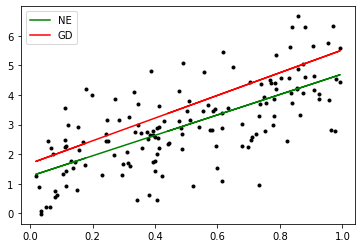

In [64]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') # 산점도
plt.plot(X.iloc[:,1], y_hat_LSE, '-g', label = 'NE') #최소제곱법
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()